In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

In [2]:
data = pd.read_csv('semenarion.csv')

In [3]:
# machine learning algorithms can only work with numbers
# so we convert the columns 'activity', 'type','riskLevel','gettingMedication' into numbers using LabelEncoder
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder() # creating an instance of label encoder


# converting the categorical values into numerical values using fit_transform
data.type = le.fit_transform(data.type)
data.activity = le.fit_transform(data.activity)
data.gettingMedication = le.fit_transform(data.gettingMedication)
data.riskLevel = le.fit_transform(data.riskLevel)
data.gender = le.fit_transform(data.gender)

In [4]:
# preparing the data for Decision Tree on Acivity Force
DataForce = data[:900]
forceTarget = DataForce['label']
DataForce = DataForce.drop('label',axis='columns')
DataForce = DataForce.drop('activity',axis='columns')

In [5]:
# the dataFrame now contains only the features what is relevant to the classification
DataForce

,glucose,weight,heartbeat,bloodpressure,age,gettingMedication,riskLevel,gender,type
0,119,71,85,105,48,1,1,0,2
1,117,61,72,71,60,0,2,1,4
2,78,65,88,68,40,1,0,0,4
3,103,93,73,130,54,0,1,0,2
4,76,75,80,128,42,1,1,1,2
...,...,...,...,...,...,...,...,...,...
895,77,84,79,105,55,1,0,1,4
896,114,90,89,132,33,1,1,1,4
897,116,100,97,121,71,0,0,0,2
898,114,54,69,80,32,0,0,1,2


In [6]:
# Split dataset into training set and test set
x_train,x_test,y_train,y_test = train_test_split(DataForce,forceTarget,test_size=0.2,random_state=0)

In [7]:
# Decision Tree (for Force Activity)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
DTree = DecisionTreeClassifier()
DTree.fit(x_train,y_train)
y_pred = DTree.predict(x_test)

In [8]:
# the result of the predictions
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0], dtype=int64)

In [9]:
# Accuracy Score
DTreeForceScore = round(accuracy_score(y_test,y_pred) * 100, 2)

In [10]:
DTreeForceScore

51.11

In [11]:
# F1 Score
force_f1_score = round(f1_score(y_test,y_pred) * 100, 2)

In [12]:
force_f1_score

52.69

In [13]:
# precision
precision = round(precision_score(y_test,y_pred) * 100,2)

In [14]:
precision

50.0

In [15]:
# recall
recall = round(recall_score(y_test,y_pred)*100,2)

In [16]:
recall

55.68

In [17]:
print(confusion_matrix(y_test,y_pred))

[[43 49]
 [39 49]]


C:\Users\hesha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


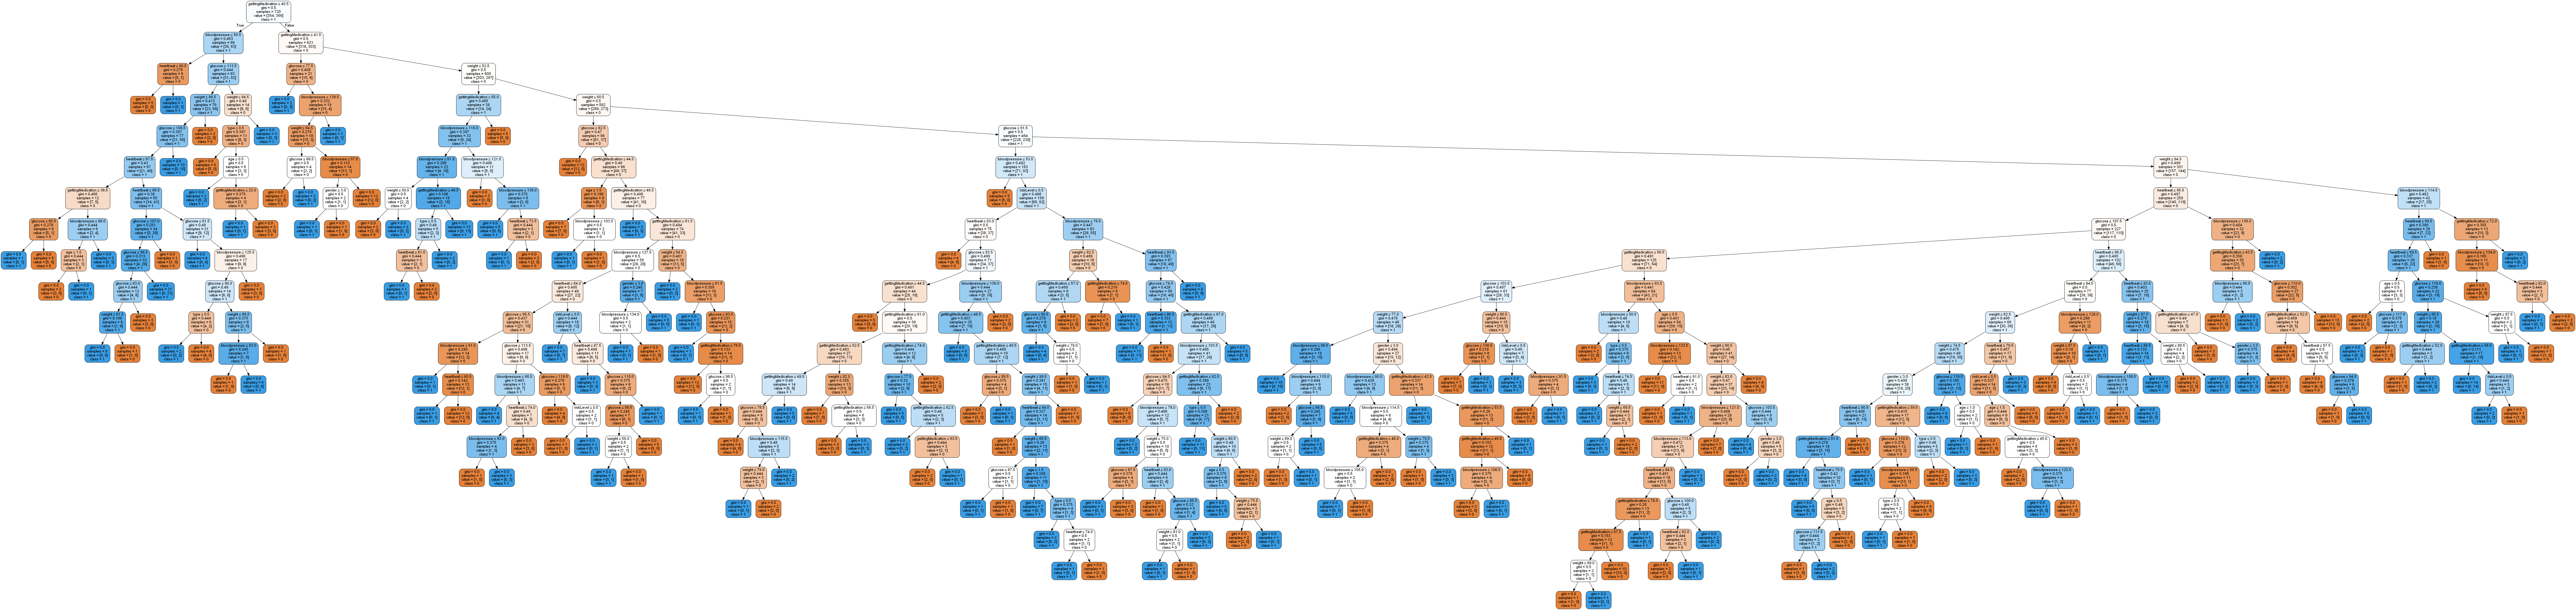

In [28]:
# visualize the algorithm
feature_cols = ['glucose','weight','heartbeat','bloodpressure','gettingMedication','riskLevel','age','type','gender']

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(DTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTreevis.01.Force.png')
Image(graph.create_png())